<a href="https://colab.research.google.com/github/TasyaFitriaAnggraini/Prediction-Heart-Disease-Random-Forest-KNN/blob/main/PenyakitLiver-KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASYA FITRIA ANGGRAINI 4611421023**

JUDUL PENELITIAN/PAPER : Klasifikasi Menggunakan Algoritma K-Nearest Neighbor untuk Prediksi Penyakit Liver 

# **INTRODUCTION**

Berdasarkan laporan data dari WHO memperlihatkan bahwa sekitar 1,2 juta orang mengalami kematian setiap tahunnya akibat penyakit hati (liver), terutama di wilayah Asia Tenggara dan Afrika. 

Sulitnya   mengenali   penyakit liversejak   dini   menjadi   permasalahan   yang   sering   terjadi.   Dengan berkembangnya teknologi, saat ini diagnosis penyakit liverdapat menggunakan metode data mining. Penelitian ini  bertujuan  untuk  mengetahui  penerapan  seleksi  fitur  dan  normalisasi  data  untuk  mencari  model  optimasi untuk  klasifikasi  penyakit liverdengan  algoritma K-Nearest  Neighbor.



# **DATA DESCRIPTION**

Proyek ini akan fokus pada prediksi penyakit liver menggunakan K Nearest Neighbor. Proyek ini akan menggunakan kumpulan data (dataset) sebanyak 583 pasien yang didistribusikan oleh UCI Machine Learning Repository.Berdasarkan atribut-atribut seperti dibawah ini

1. Age of the patient
2. Gender of the patient
3. Total Bilirubin
4. Direct Bilirubin
5. Alkaline Phosphotase
6. Alamine Aminotransferase
7. Aspartate Aminotransferase
8. Total Protiens
9. Albumin
10. Albumin and Globulin Ratio
11. Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

# **IMPORT LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


# **Exploratory Data Analysis (EDA)**

Analisis Data Eksploratori (EDA) adalah proses untuk memahami dan menganalisis dataset sebelum melakukan pemodelan atau prediksi. Dalam EDA, kita dapat melakukan berbagai tugas seperti memeriksa struktur data, mengeksplorasi statistik deskriptif, mencari hubungan antar variabel, dan mengidentifikasi pola atau anomali.

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/indian_liver_patient.csv")

In [3]:
#Mengetahui Tipe Objek dari suatu Variabel
type(df)

pandas.core.frame.DataFrame

In [4]:
#Mengetahui Jumlah Kolom Baris dalam Dataset
df.shape

(583, 11)

In [5]:
#Menampilkan 5 Baris Pertama dari Dataset
df.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
#Memilih Baris Tertentu dalam Dataset berdasarkan Indeks Baris yang Diberikan
rows_to_display = [248, 147, 239, 4, 7]
selected_rows = df.iloc[rows_to_display]

print(selected_rows)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
248   40    Male              0.7               0.1                   202   
147   65    Male              0.7               0.1                   392   
239   40    Male              0.9               0.3                   196   
4     72    Male              3.9               2.0                   195   
7     29  Female              0.9               0.3                   202   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
248                        37                          29             5.0   
147                        20                          30             5.3   
239                        69                          48             6.8   
4                          27                          59             7.3   
7                          14                          11             6.7   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
248      2.6          

In [7]:
#Menghasilkan Ringkasan Statistik dari Dataset
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
df["Dataset"].describe()

count    583.000000
mean       1.286449
std        0.452490
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Dataset, dtype: float64

# **Visualization Of Categorical Features**

Visualisasi fitur kategorikal adalah metode untuk menggambarkan dan memahami hubungan antara fitur kategorikal dalam dataset. Ini membantu kita memperoleh wawasan tentang distribusi dan pola kategori dalam fitur yang terlibat.

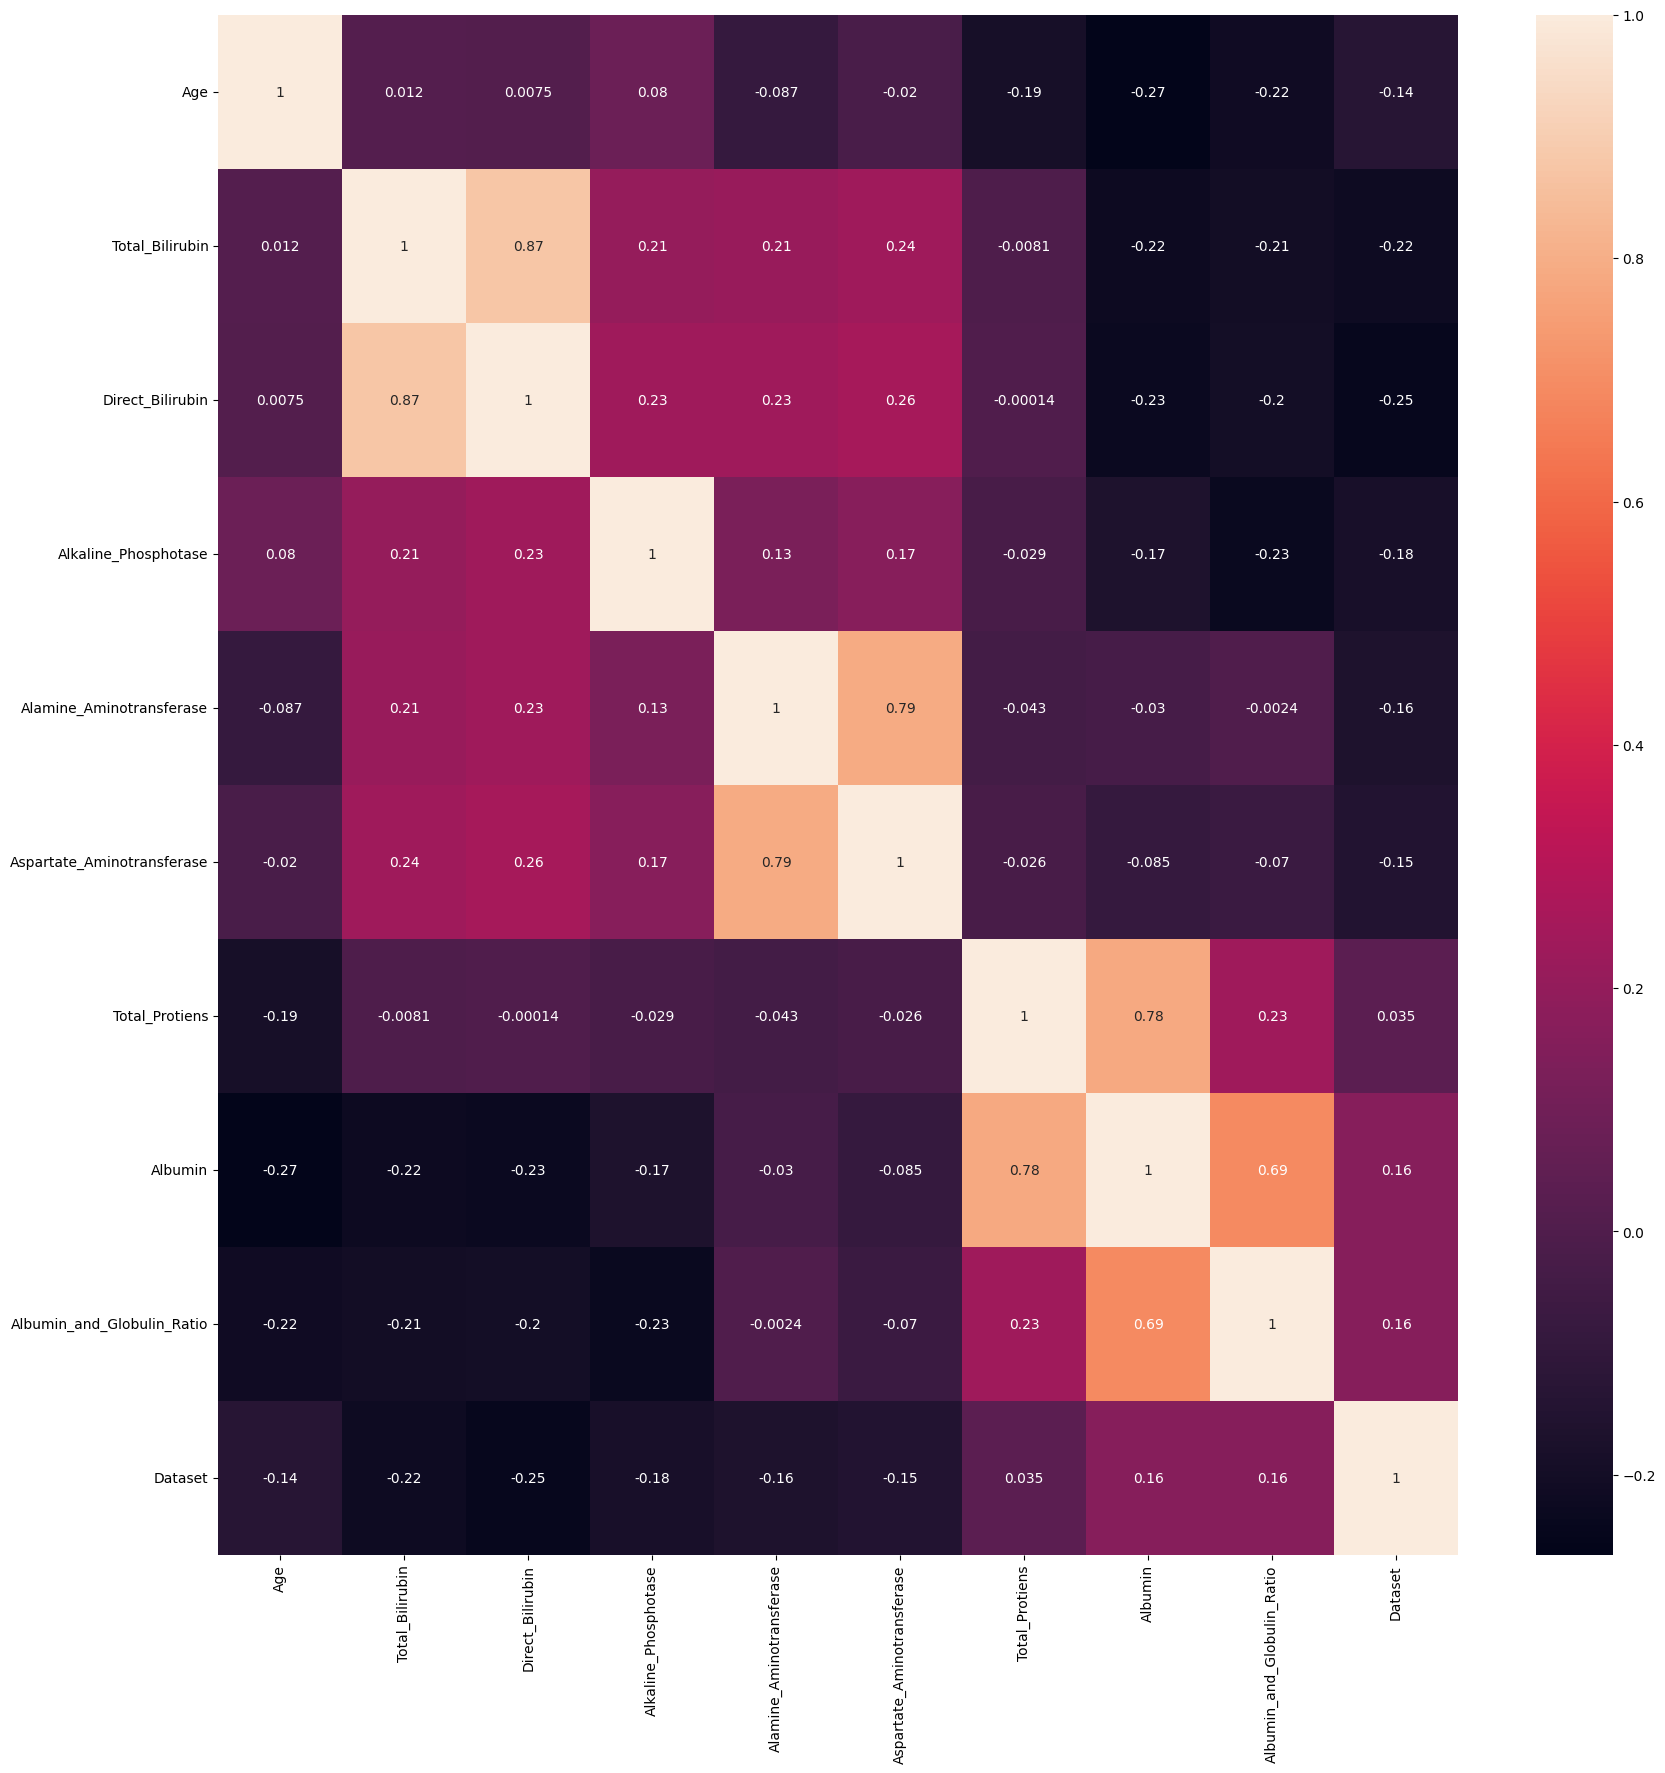

In [10]:
#Heatmap yang Memvisualisasikan Tingkat Korelasi antar Kolom Numerik dalam Dataset
corrmat=df.corr()
tf=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[tf].corr(),annot=True)

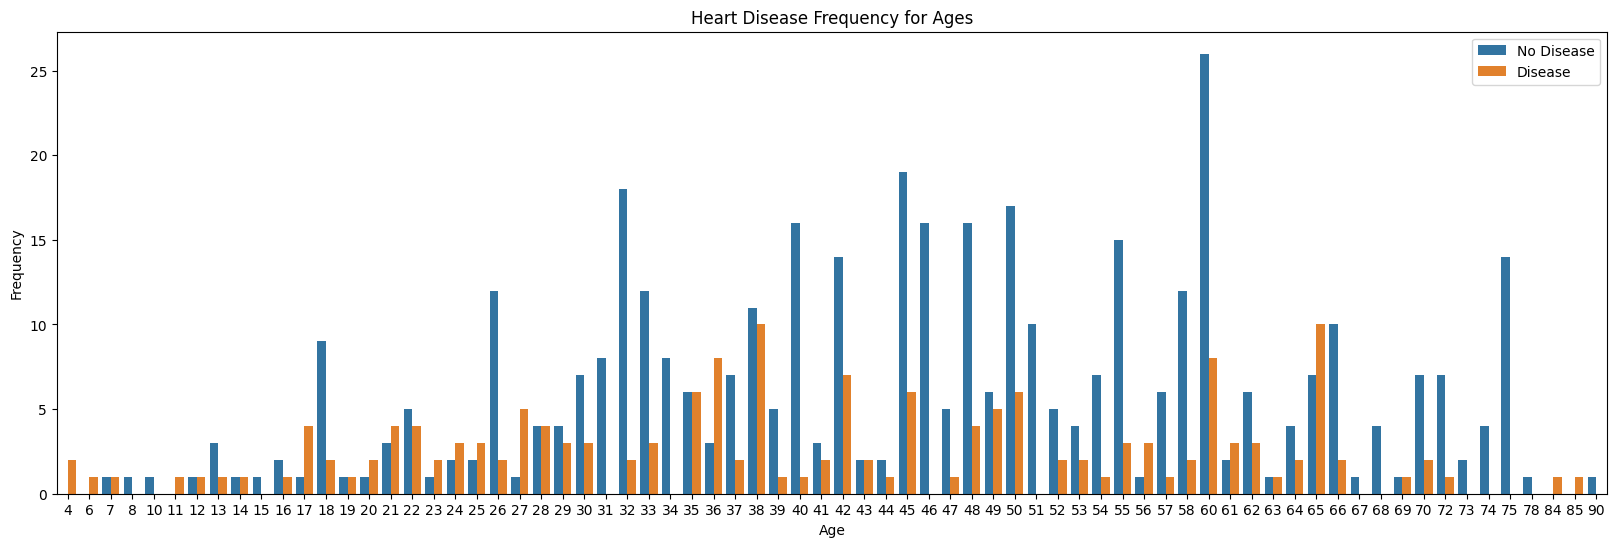

In [11]:
#Memperlihatkan Heart Disease Frequenzy untuk Age
def plotHeartDiseaseFrequency():
    plt.figure(figsize=(20, 6))
    sns.countplot(x='Age', hue='Dataset', data=df)
    plt.title("Heart Disease Frequency for Ages")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.legend(['No Disease', 'Disease'])
    plt.show()

plotHeartDiseaseFrequency()

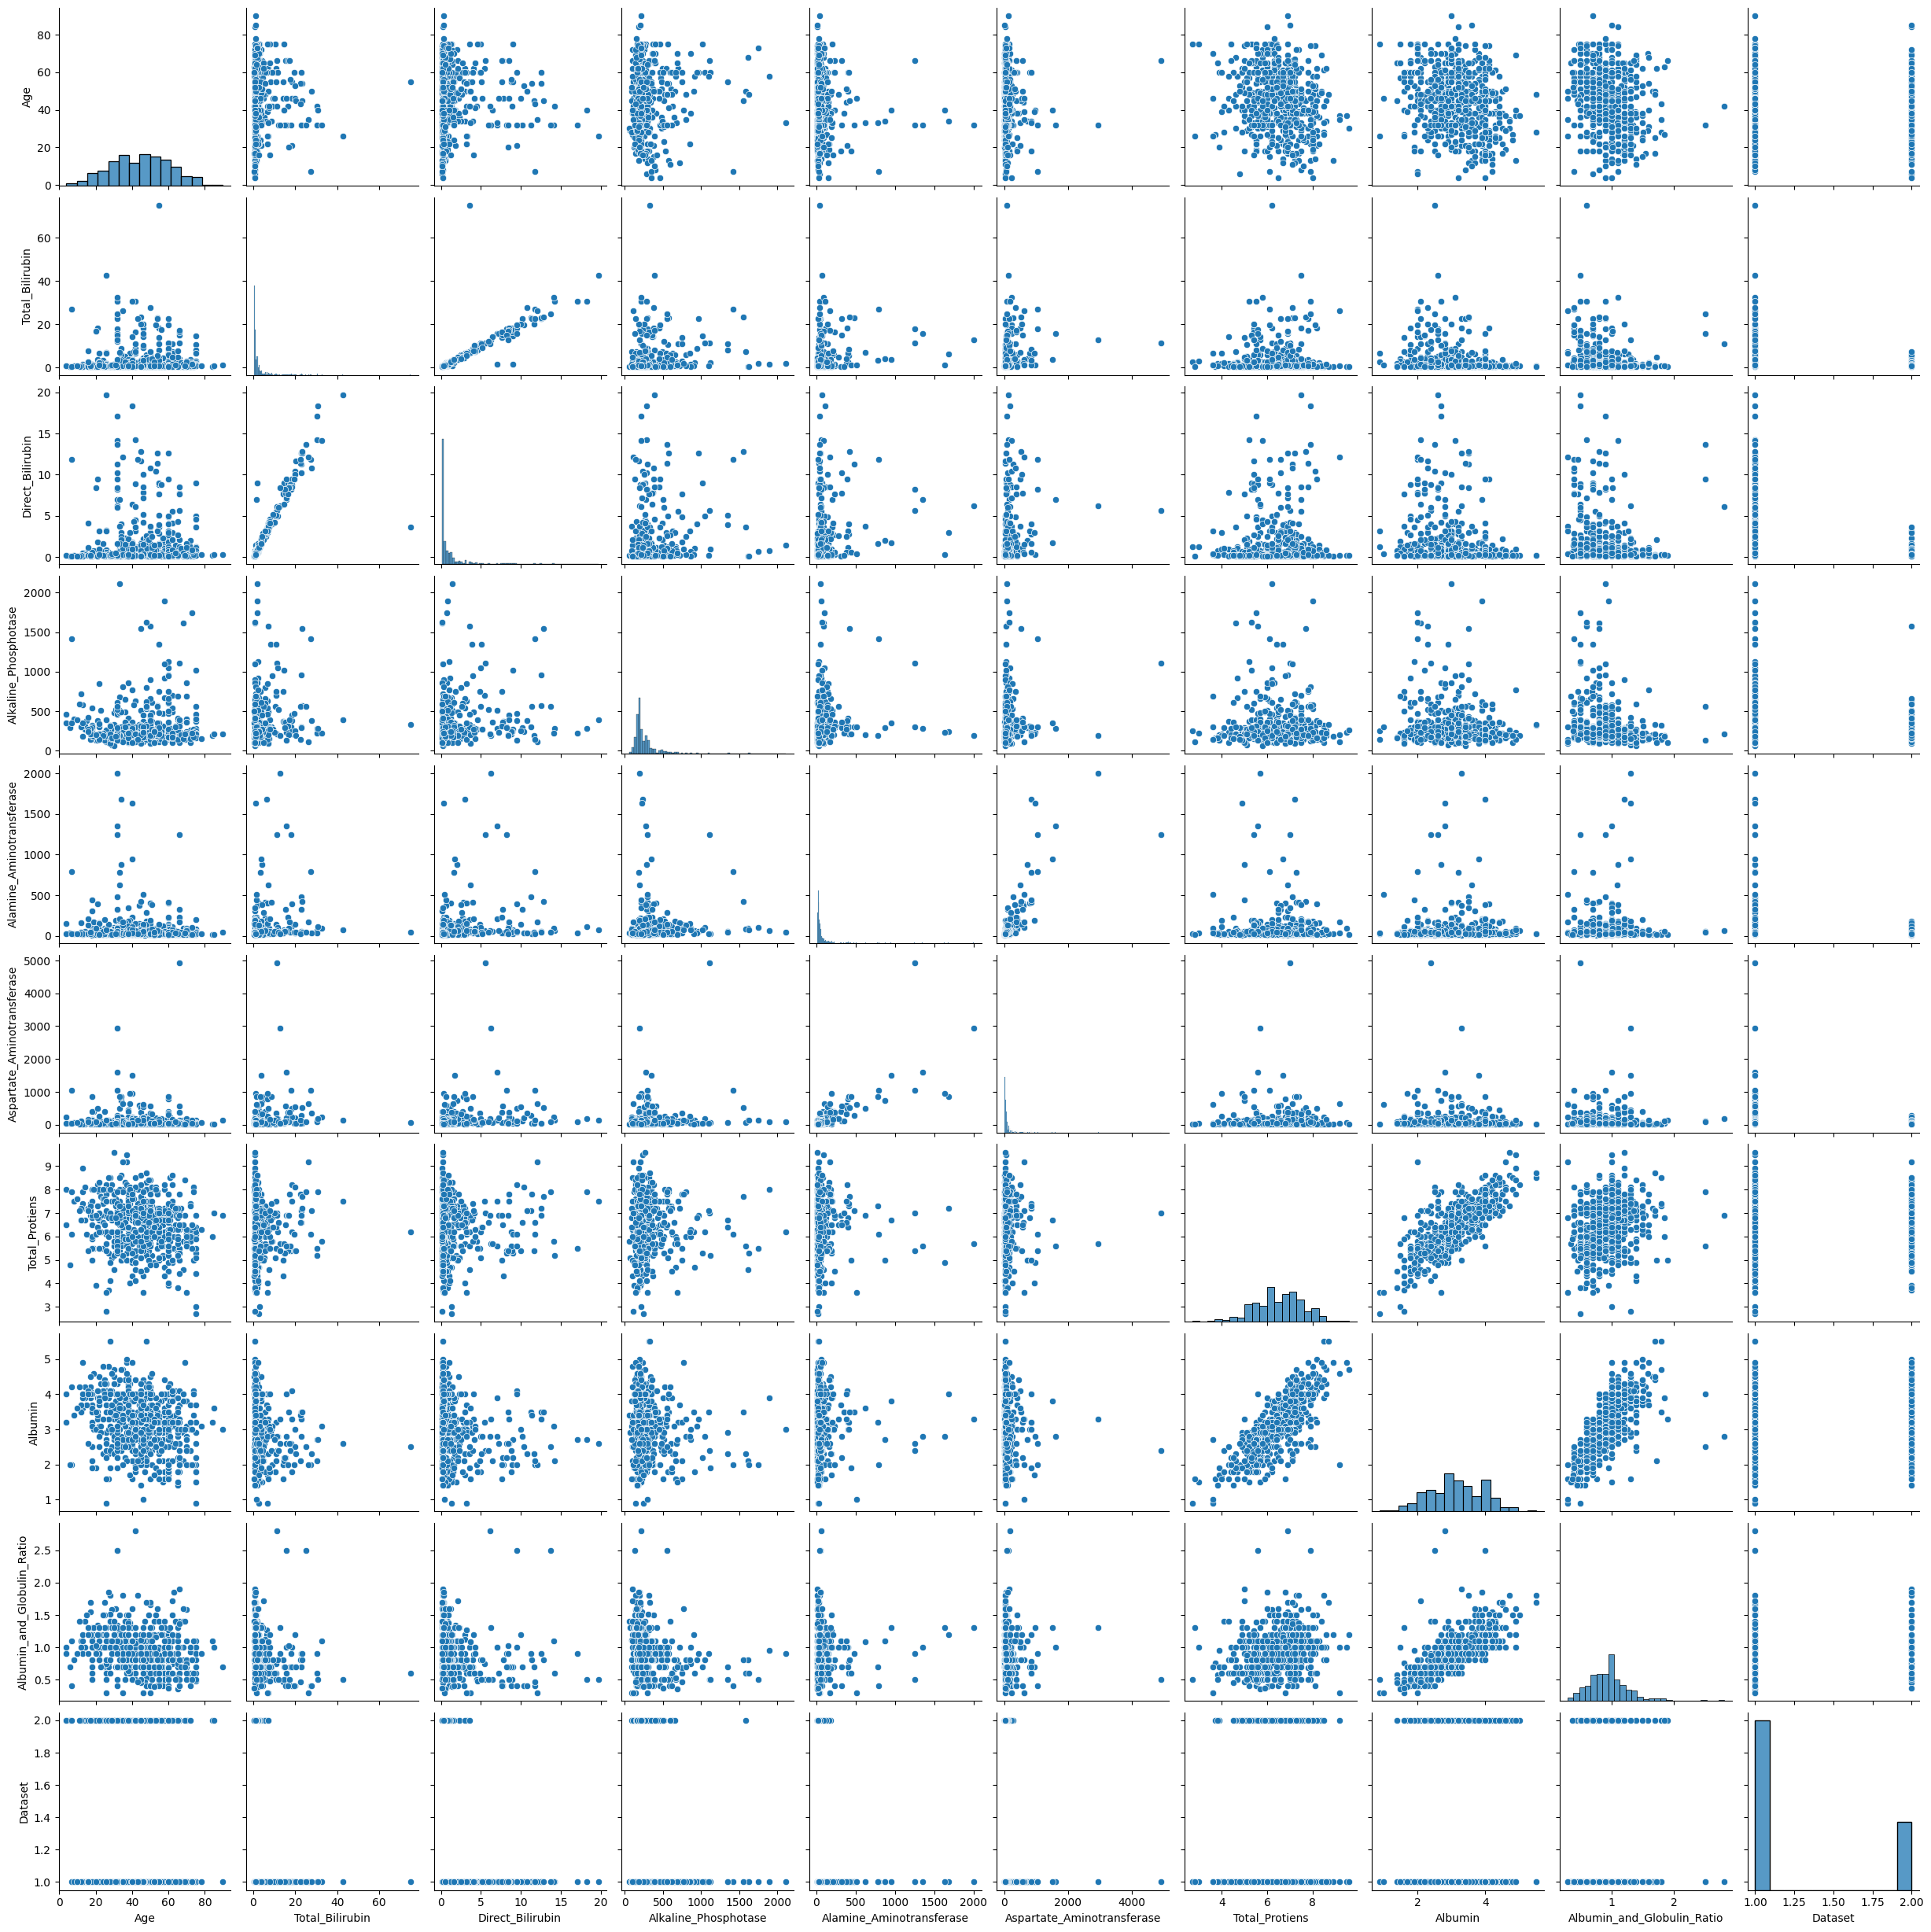

In [12]:
#Membuat Matriks PlotSebar(Scatter Plot) dari Dataset
sns.pairplot(df)

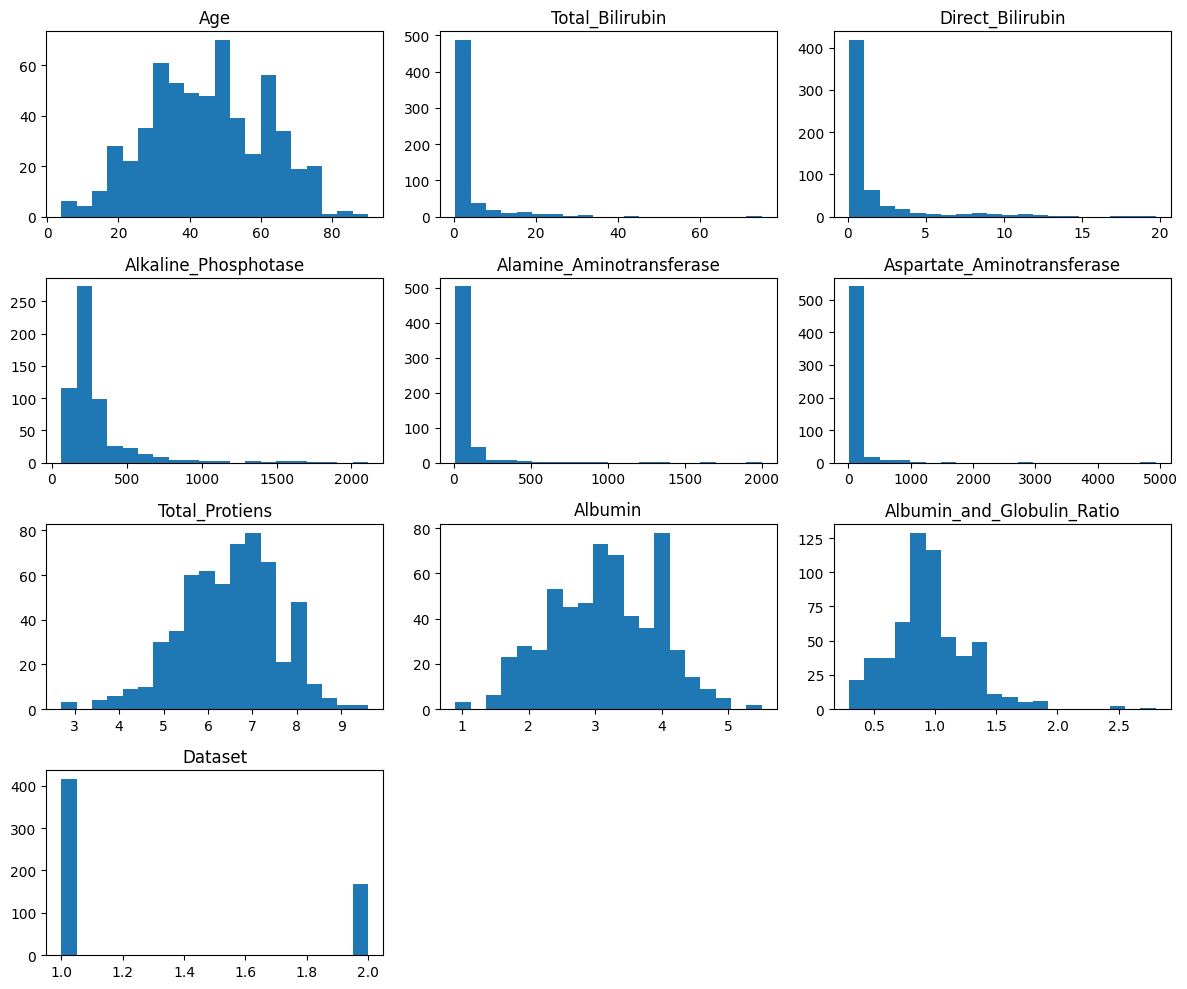

In [13]:
#Memperlihatkan Semua Variabel pada Dataset
df.hist(figsize=(12, 10), bins=20, grid=False)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

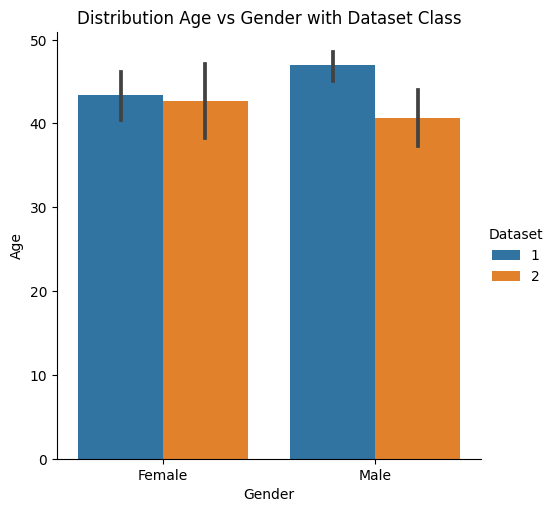

In [14]:
#Distribusi Usia (age) vs Jenis Kelamin (Sex) dengan Kelas Target (target)
plt.figure(figsize=(10, 6))
sns.catplot(kind='bar', data=df, y='Age', x='Gender', hue='Dataset')
plt.title('Distribution Age vs Gender with Dataset Class')
plt.show()

<Figure size 2000x2000 with 0 Axes>

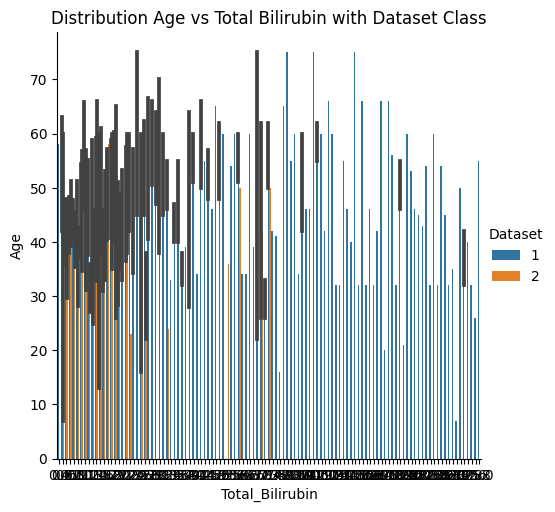

In [15]:
#Distribusi Usia (age) vs Total Bilirubin dengan Kelas Target (target)
plt.figure(figsize=(20, 20))
sns.catplot(kind='bar', data=df, y='Age', x='Total_Bilirubin', hue='Dataset')
plt.title('Distribution Age vs Total Bilirubin with Dataset Class')
plt.show()

<Axes: xlabel='Total_Bilirubin', ylabel='Density'>

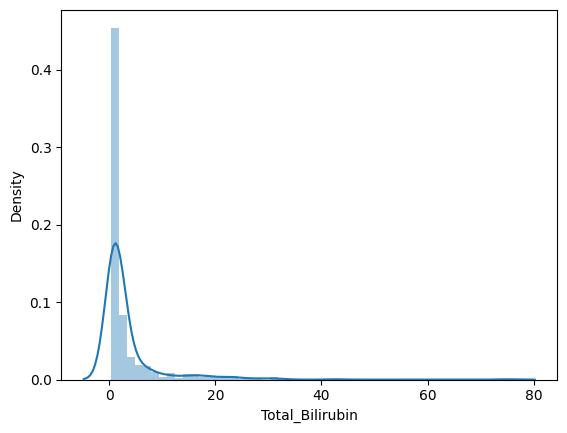

In [16]:
sns.distplot(df["Total_Bilirubin"])

<Figure size 2000x2000 with 0 Axes>

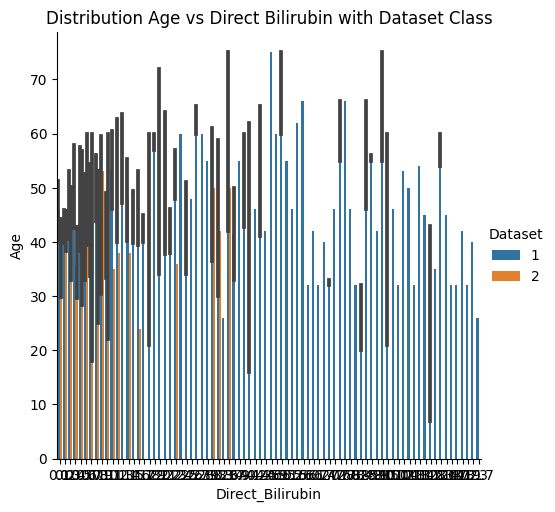

In [17]:
#Distribusi Usia (age) vs Direct Bilirubin dengan Kelas Target (target)
plt.figure(figsize=(20, 20))
sns.catplot(kind='bar', data=df, y='Age', x='Direct_Bilirubin', hue='Dataset')
plt.title('Distribution Age vs Direct Bilirubin with Dataset Class')
plt.show()

<Axes: xlabel='Direct_Bilirubin', ylabel='Density'>

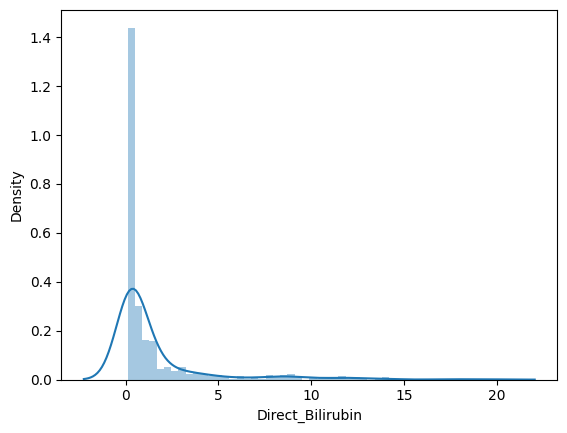

In [18]:
sns.distplot(df["Direct_Bilirubin"])

<Figure size 2000x2000 with 0 Axes>

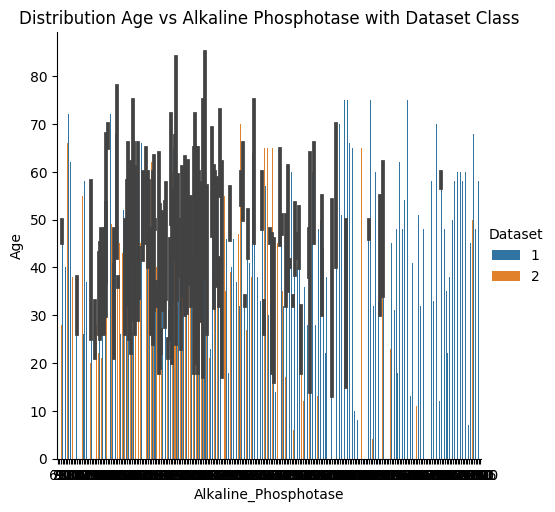

In [19]:
#Distribusi Usia (age) vs Alkaline Phosphotase dengan Kelas Target (target)
plt.figure(figsize=(20, 20))
sns.catplot(kind='bar', data=df, y='Age', x='Alkaline_Phosphotase', hue='Dataset')
plt.title('Distribution Age vs Alkaline Phosphotase with Dataset Class')
plt.show()

<Axes: xlabel='Alkaline_Phosphotase', ylabel='Density'>

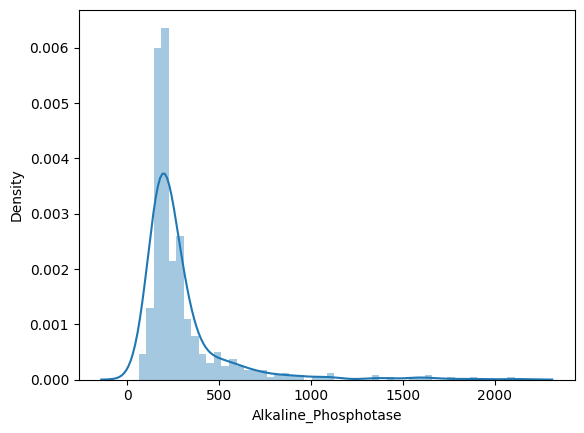

In [20]:
sns.distplot(df["Alkaline_Phosphotase"])

<Figure size 2000x2000 with 0 Axes>

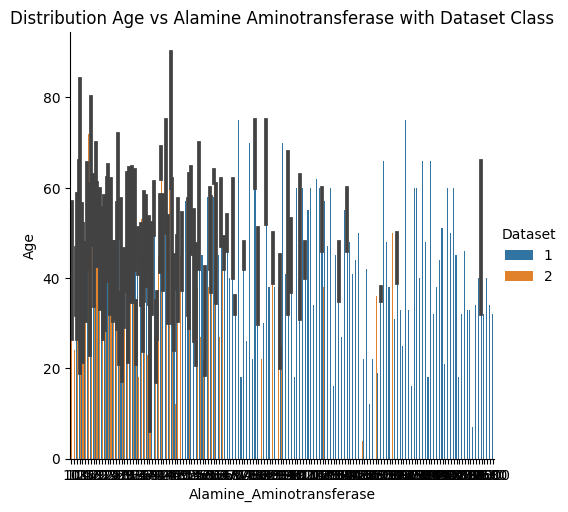

In [21]:
#Distribusi Usia (age) vs Alamine Aminotransferase dengan Kelas Target (target)
plt.figure(figsize=(20, 20))
sns.catplot(kind='bar', data=df, y='Age', x='Alamine_Aminotransferase', hue='Dataset')
plt.title('Distribution Age vs Alamine Aminotransferase with Dataset Class')
plt.show()

<Axes: xlabel='Alamine_Aminotransferase', ylabel='Density'>

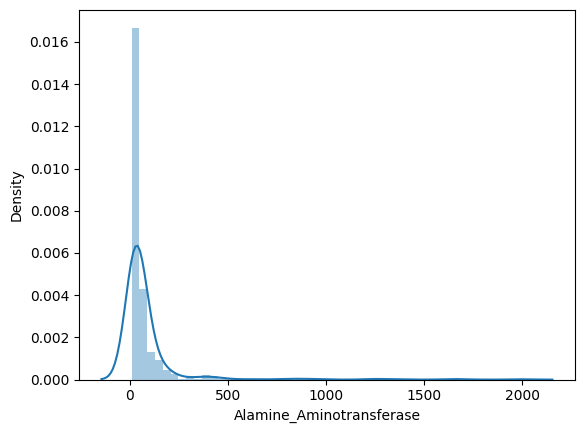

In [22]:
sns.distplot(df["Alamine_Aminotransferase"])

<Figure size 2000x2000 with 0 Axes>

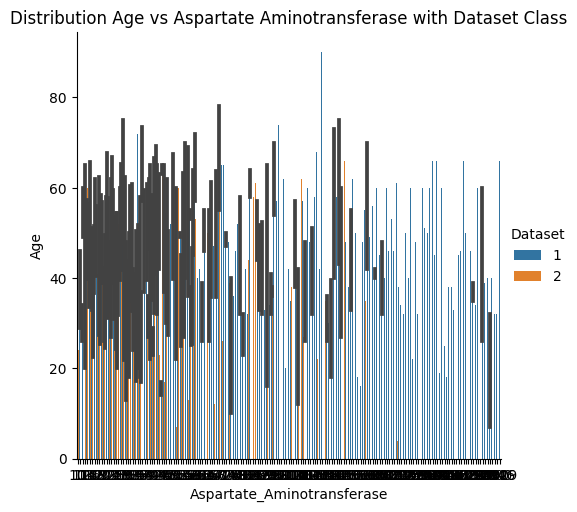

In [23]:
#Distribusi Usia (age) vs Aspartate Aminotransferase dengan Kelas Target (target)
plt.figure(figsize=(20, 20))
sns.catplot(kind='bar', data=df, y='Age', x='Aspartate_Aminotransferase', hue='Dataset')
plt.title('Distribution Age vs Aspartate Aminotransferase with Dataset Class')
plt.show()

<Axes: xlabel='Aspartate_Aminotransferase', ylabel='Density'>

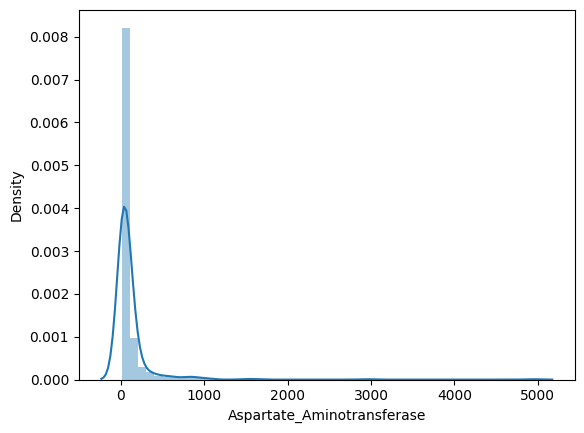

In [24]:
sns.distplot(df["Aspartate_Aminotransferase"])

<Figure size 2000x2000 with 0 Axes>

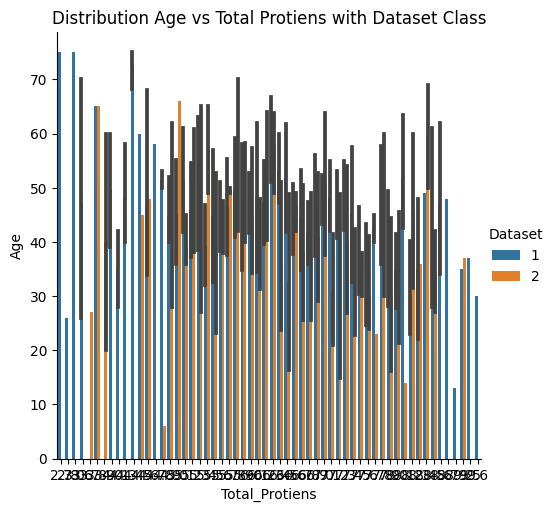

In [25]:
#Distribusi Usia (age) vs Total Protiens dengan Kelas Target (target)
plt.figure(figsize=(20, 20))
sns.catplot(kind='bar', data=df, y='Age', x='Total_Protiens', hue='Dataset')
plt.title('Distribution Age vs Total Protiens with Dataset Class')
plt.show()

<Axes: xlabel='Total_Protiens', ylabel='Density'>

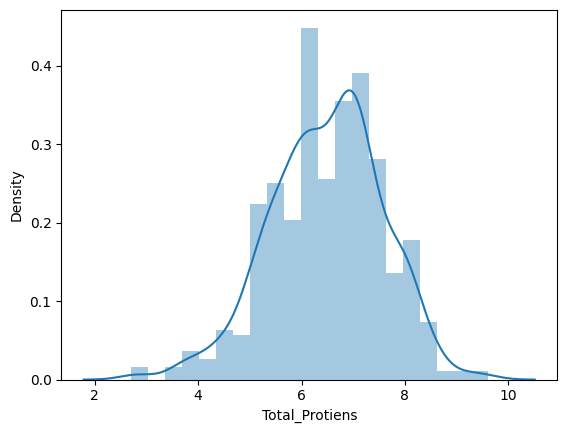

In [26]:
sns.distplot(df["Total_Protiens"])

<Figure size 2000x2000 with 0 Axes>

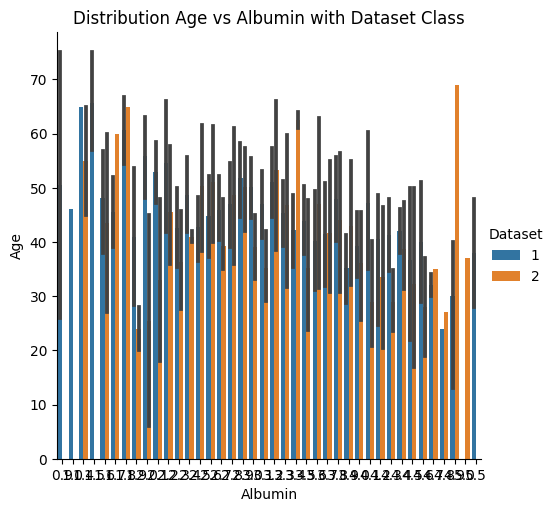

In [27]:
#Distribusi Usia (age) vs Albumin dengan Kelas Target (target)
plt.figure(figsize=(20, 20))
sns.catplot(kind='bar', data=df, y='Age', x='Albumin', hue='Dataset')
plt.title('Distribution Age vs Albumin with Dataset Class')
plt.show()

<Axes: xlabel='Albumin', ylabel='Density'>

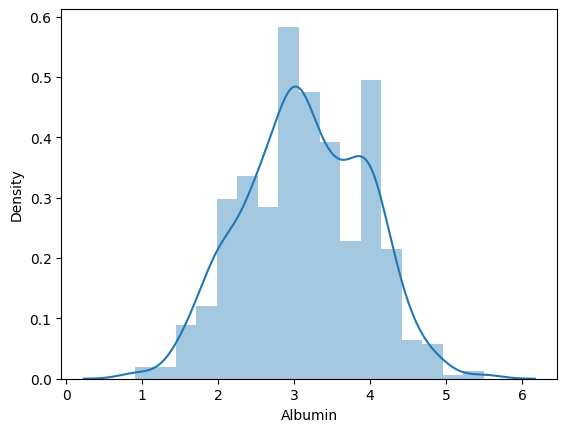

In [28]:
sns.distplot(df["Albumin"])

<Figure size 2000x2000 with 0 Axes>

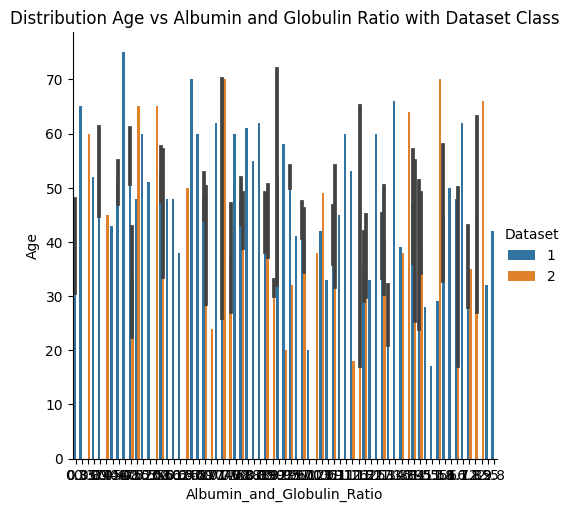

In [29]:
#Distribusi Usia (age) vs Albumin and Globulin Ratio dengan Kelas Target (target)
plt.figure(figsize=(20, 20))
sns.catplot(kind='bar', data=df, y='Age', x='Albumin_and_Globulin_Ratio', hue='Dataset')
plt.title('Distribution Age vs Albumin and Globulin Ratio with Dataset Class')
plt.show()

<Axes: xlabel='Albumin_and_Globulin_Ratio', ylabel='Density'>

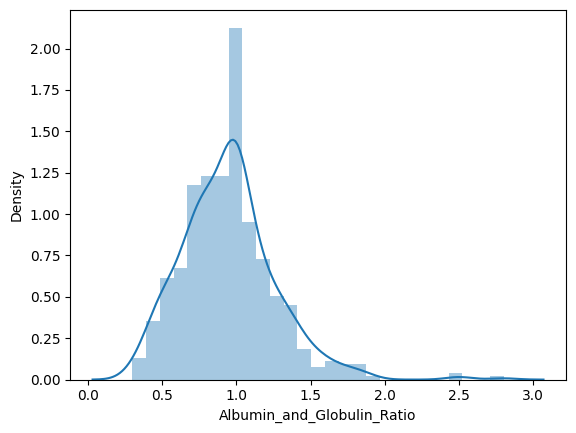

In [30]:
sns.distplot(df["Albumin_and_Globulin_Ratio"])

# **DATA PREPOCESSING**

Membagi Data Training dan Data Testing

In [31]:
#Mengubah Nilai Dalam Kolom 'Dataset'
df['Dataset'] = df['Dataset'].map(lambda x:0 if x==2 else 1)
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,0


In [32]:
#Mengubah Nilai Dalam Kolom 'Gender'
df['Gender'] = df['Gender'].map(lambda x:0 if x=='Female' else 1)
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,1,1.0,0.3,216,21,24,7.3,4.4,1.50,0


In [33]:
df.drop('Dataset',axis=1).skew()

Age                           -0.029385
Gender                        -1.197919
Total_Bilirubin                4.907474
Direct_Bilirubin               3.212403
Alkaline_Phosphotase           3.765106
Alamine_Aminotransferase       6.549192
Aspartate_Aminotransferase    10.546177
Total_Protiens                -0.285672
Albumin                       -0.043685
Albumin_and_Globulin_Ratio     0.992299
dtype: float64

In [34]:
df.corr()['Dataset'].sort_values(ascending=False)

Dataset                       1.000000
Direct_Bilirubin              0.246046
Total_Bilirubin               0.220208
Alkaline_Phosphotase          0.184866
Alamine_Aminotransferase      0.163416
Aspartate_Aminotransferase    0.151934
Age                           0.137351
Gender                        0.082416
Total_Protiens               -0.035008
Albumin                      -0.161388
Albumin_and_Globulin_Ratio   -0.163131
Name: Dataset, dtype: float64

In [35]:
Target = df['Dataset']
Features = df.drop('Dataset', axis=1)
Features.head(2)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features,Target, test_size=0.2, random_state=42)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (466, 10)
y_train:  (466,)
X_test:  (117, 10)
y_test:  (117,)


In [37]:
#Mendeteksi Keberadaan Nilai NaN Dalam Array NumPy
X_train.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    2
dtype: int64

# **KLASIFIKASI ALGORITMA K NEAREST NEIGHBOR**

In [38]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Mengisi nilai NaN dengan nilai yang valid
value = 1  # Ganti dengan nilai yang sesuai
X_train_filled = X_train.fillna(value)

# Membuat dan melatih model k-NN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_filled, y_train)

# Melakukan prediksi dengan data uji (X_test)
X_test_filled = X_test.fillna(value)  # Jika ada nilai NaN dalam X_test
prediction = knn.predict(X_test_filled)

In [39]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train_filled, y_train)
    knn_scores.append(knn_classifier.score(X_test_filled, y_test))

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {knn_scores[7] * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {knn_scores[7] * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [46]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_classifier.fit(X_train_filled, y_train)

print_score(knn_classifier, X_train_filled, y_train, X_test_filled, y_test, train=True)
print_score(knn_classifier, X_train_filled, y_train, X_test_filled, y_test, train=False)

Train Result:
Accuracy Score: 71.79%
_______________________________________________
Classification Report:	Precision Score: 83.70%
			Recall Score: 81.16%
			F1 score: 82.41%
_______________________________________________
Confusion Matrix: 
 [[ 85  52]
 [ 62 267]]

Test Result:
Accuracy Score: 71.79%
_______________________________________________
Classification Report:	Precision Score: 82.14%
			Recall Score: 79.31%
			F1 score: 80.70%
_______________________________________________
Confusion Matrix: 
 [[15 15]
 [18 69]]



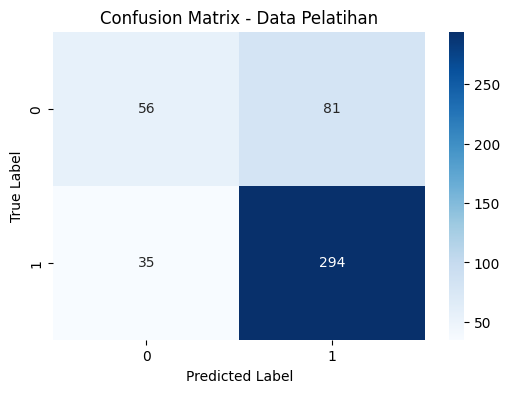

In [47]:
import seaborn as sns

# Confusion matrix for training data
train_pred = knn.predict(X_train_filled)
train_cm = confusion_matrix(y_train, train_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Data Pelatihan')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

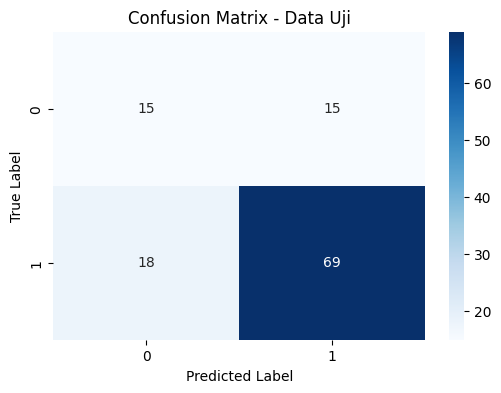

In [48]:
import seaborn as sns

# Prediksi pada data test
test_pred = knn_classifier.predict(X_test_filled)
test_cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Data Uji')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# SESUDAH SMOTE
SMOTE (Synthetic Minority Over-sampling Technique) adalah metode yang digunakan untuk menangani ketidakseimbangan kelas dalam masalah klasifikasi. Ketidakseimbangan kelas terjadi ketika jumlah sampel dalam kelas minoritas jauh lebih sedikit dibandingkan dengan kelas mayoritas dalam data pelatihan.

In [49]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()
X_sm,  y_sm =  smote.fit_resample(X_train_filled, y_train)
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_sm))

Before SMOTE:  Counter({1: 329, 0: 137})
After SMOTE:  Counter({1: 329, 0: 329})


In [50]:
smote = SMOTE()
X_sm_test,  y_sm_test =  smote.fit_resample(X_test_filled, y_test)
print("Before SMOTE: ", Counter(y_test))
print("After SMOTE: ", Counter(y_sm_test))

Before SMOTE:  Counter({1: 87, 0: 30})
After SMOTE:  Counter({0: 87, 1: 87})


In [51]:
def get_train_report(model):
    train_pred = model.predict(X_sm)
    return(classification_report(y_sm, train_pred))

def get_test_report(model):
    test_pred = model.predict(X_sm_test)
    return(classification_report(y_sm_test, test_pred))

def plot_confusion_matrix(model):
    y_pred = model.predict(X_sm_test)
    cm = confusion_matrix(y_sm_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True,  cbar = False,linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
    
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_sm_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_sm_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Liver Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_sm_test, y_pred_prob),4)))
    plt.grid(True)

In [64]:
models = list()
models.append(KNeighborsClassifier(n_neighbors=3))

In [67]:
from sklearn.metrics import classification_report

for mods in models:
    print('Model Name: ', mods)
    clf = mods
    model = clf.fit(X_sm,  y_sm)
    print('\n')
    print("Classification Train report: ")
    train_report = get_train_report(model)
    print(train_report)
    print("Classification Test report: ")
    test_report = get_test_report(model)
    print(test_report)

    # Menampilkan akurasi dengan dua angka desimal di belakang koma
    train_accuracy = model.score(X_sm, y_sm)
    test_accuracy = model.score(X_test_filled, y_test)
    print("Train Accuracy: {:.2f}%".format(train_accuracy * 100))
    print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


Model Name:  KNeighborsClassifier(n_neighbors=3)


Classification Train report: 
              precision    recall  f1-score   support

           0       0.79      0.95      0.87       329
           1       0.94      0.75      0.84       329

    accuracy                           0.85       658
   macro avg       0.87      0.85      0.85       658
weighted avg       0.87      0.85      0.85       658

Classification Test report: 
              precision    recall  f1-score   support

           0       0.68      0.75      0.71        87
           1       0.72      0.66      0.69        87

    accuracy                           0.70       174
   macro avg       0.70      0.70      0.70       174
weighted avg       0.70      0.70      0.70       174

Train Accuracy: 85.41%
Test Accuracy: 65.81%


Model Name: KNeighborsClassifier(n_neighbors=3)

Classification Train report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.87       329
           1       0.94      0.75      0.84       329

    accuracy                           0.85       658
   macro avg       0.87      0.85      0.85       658
weighted avg       0.87      0.85      0.85       658

Classification Test report:
              precision    recall  f1-score   support

           0       0.40      0.67      0.50        30
           1       0.85      0.66      0.74        87

    accuracy                           0.66       117
   macro avg       0.63      0.66      0.62       117
weighted avg       0.74      0.66      0.68       117

Train Accuracy: 85.41%
Test Accuracy: 65.81%


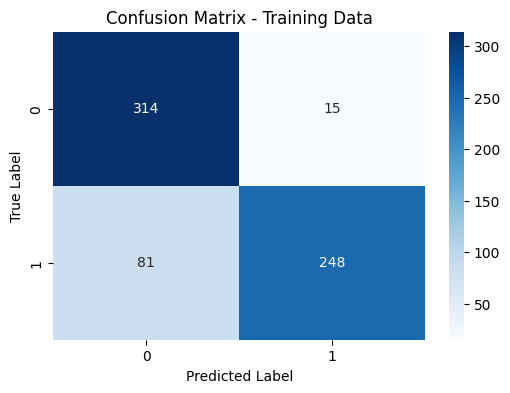

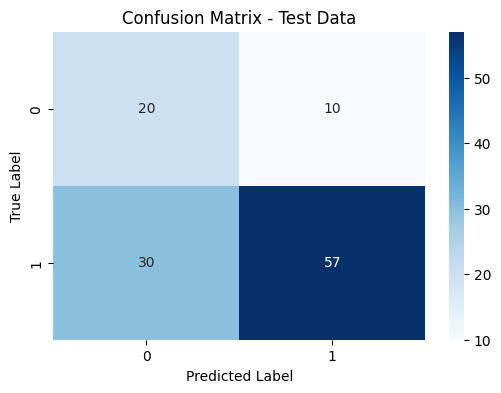

In [72]:
from sklearn.metrics import confusion_matrix

for model in models:
    print('Model Name:', model)
    clf = model
    fitted_model = clf.fit(X_sm, y_sm)

    print('\nClassification Train report:')
    train_report = classification_report(y_sm, fitted_model.predict(X_sm))
    print(train_report)

    print('Classification Test report:')
    test_report = classification_report(y_test, fitted_model.predict(X_test_filled))
    print(test_report)

    train_accuracy = fitted_model.score(X_sm, y_sm)
    test_accuracy = fitted_model.score(X_test_filled, y_test)
    print('Train Accuracy: {:.2f}%'.format(train_accuracy * 100))
    print('Test Accuracy: {:.2f}%'.format(test_accuracy * 100))

    # Confusion matrix for training data
    train_pred = fitted_model.predict(X_sm)
    train_cm = confusion_matrix(y_sm, train_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Training Data')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Confusion matrix for test data
    test_pred = fitted_model.predict(X_test_filled)
    test_cm = confusion_matrix(y_test, test_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Test Data')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
